**LOADING THE DATASET:**

In [170]:
#Loading the dataframe
import pandas as pd 
df = pd.read_csv('/Users/hepsiba/Downloads/archive (3)/sample.csv')
df.head(10)

,tweet_id,author_id,inbound,created_at,text,response_tweet_id,in_response_to_tweet_id
0,119237,105834,True,Wed Oct 11 06:55:44 +0000 2017,@AppleSupport causing the reply to be disregar...,119236,NaN
1,119238,ChaseSupport,False,Wed Oct 11 13:25:49 +0000 2017,@105835 Your business means a lot to us. Pleas...,NaN,119239.0
2,119239,105835,True,Wed Oct 11 13:00:09 +0000 2017,@76328 I really hope you all change but I'm su...,119238,NaN
3,119240,VirginTrains,False,Tue Oct 10 15:16:08 +0000 2017,@105836 LiveChat is online at the moment - htt...,119241,119242.0
4,119241,105836,True,Tue Oct 10 15:17:21 +0000 2017,@VirginTrains see attached error message. I've...,119243,119240.0
5,119243,VirginTrains,False,Tue Oct 10 15:25:14 +0000 2017,"@105836 Have you tried from another device, Mi...",119244,119241.0
6,119244,105836,True,Tue Oct 10 15:26:44 +0000 2017,"@VirginTrains yep, I've tried laptop too sever...",119245,119243.0
7,119245,VirginTrains,False,Tue Oct 10 15:33:22 +0000 2017,"@105836 It's working OK from here, Miriam. Doe...",NaN,119244.0
8,119242,105836,True,Tue Oct 10 15:09:00 +0000 2017,@VirginTrains I still haven't heard &amp; the ...,119240,119246.0
9,119246,VirginTrains,False,Tue Oct 10 10:13:19 +0000 2017,@105836 That's what we're here for Miriam 😊 T...,119242,119247.0


**REMOVING STOPWORDS:**

In [171]:
import nltk
nltk.download('stopwords')
stopwords = set(nltk.corpus.stopwords.words('english'))
print(stopwords)

{"needn't", 'few', 'won', 'such', 'did', "haven't", 'its', 'own', 'being', 'ain', 'ma', 'each', 'my', 'above', "wouldn't", 'theirs', "won't", 'you', "mightn't", 'between', 'shan', "shouldn't", 'this', 'just', 're', 'both', 'while', "should've", 'themselves', 'be', 'our', 'in', "couldn't", 'himself', 'mustn', 'who', 'she', 'd', "you'll", 'their', 'had', "you're", 'i', 'when', 's', 've', 'myself', 'your', "it's", 'now', 'some', "hasn't", 'from', 'on', 'was', 'or', 'shouldn', 'are', 'after', 'does', "mustn't", 'doesn', 'hadn', 'down', 'm', 'there', 'yours', 'by', 'until', 'we', 'why', 'all', "doesn't", "that'll", 'more', 'have', 'and', 'what', "you'd", 'the', 'through', 'again', 'nor', 'where', 'once', 'out', 'further', 'needn', 'isn', "wasn't", 'aren', 'whom', 'that', 'has', 'o', 'but', 'having', 'were', 'up', 'her', 'as', 'how', "didn't", "aren't", 'haven', 'of', 'couldn', 'they', 'yourself', 'herself', 'too', 'them', 'very', 'll', 'will', 'which', 'same', 'a', 'mightn', 'so', 'here', '

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/hepsiba/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


**PRE-PROCESSING PIPELINE:**

In [172]:
# Using regular expression to find all words and hyphenated words in the text
import regex as re
import regex as re
def tokenize(text):
    return re.findall(r'[\w-]*[a-z|A-Z][\w-]*', text)


In [173]:
# Use list comprehension to filter out tokens that are not in the set of stopwords
def remove_stop(tokens):
    return [t for t in tokens if t.lower() not in stopwords]


In [174]:
pipeline = [str.lower, tokenize, remove_stop]
def prepare(text, pipeline):
    tokens = text
    for fun in pipeline:
        tokens = fun(tokens)
    return tokens


In [175]:
df['tokens'] = df['text'].apply(prepare, pipeline=pipeline)

**COUNTING THE TOKENS:**

In [176]:
# Map the update method of the Counter object to each list of tokens in the DataFrame column 'tokens'
from collections import Counter
counter = Counter()
df['tokens'].map(counter.update)
freq_df = pd.DataFrame.from_dict(counter, orient='index',columns=['freq'])
freq_df = freq_df.query('freq >= 1')
freq_df.index.name = 'token'
freq_df = freq_df.sort_values('freq', ascending=False)
freq_df.head(20)

,freq
token,
co,28
https,28
us,25
help,19
dm,19
thanks,13
gdrqu22ypt,12
applesupport,11
please,11


**WORDCLOUD:**

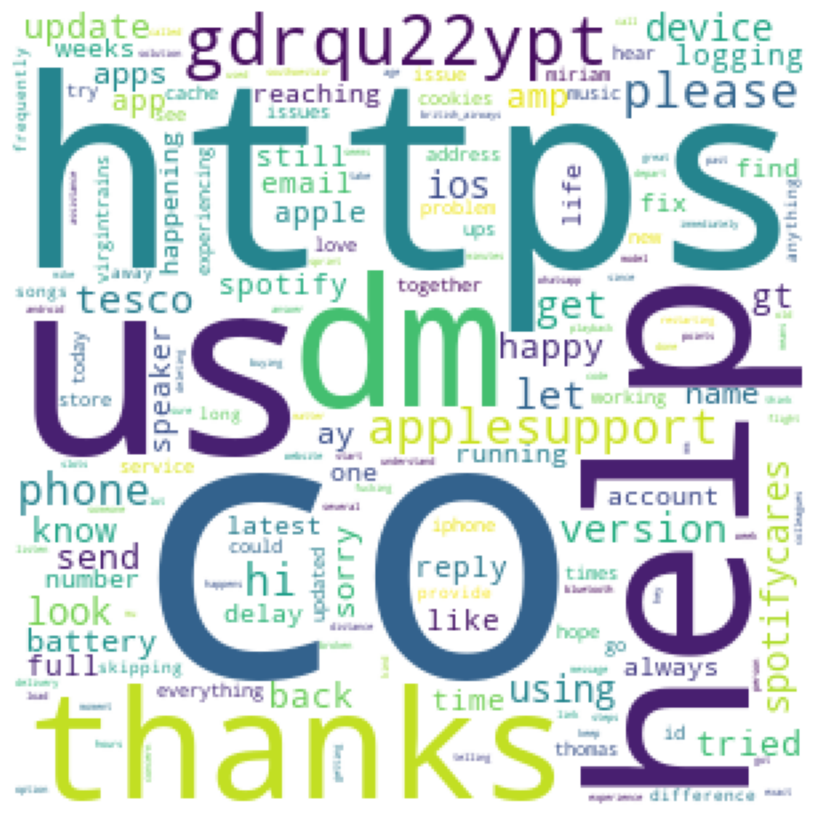

In [177]:
from wordcloud import WordCloud
from matplotlib import pyplot as plt
wc = WordCloud(background_color='white', width = 300, height=300, 
margin=2)
wc.fit_words(freq_df['freq'].to_dict() )
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wc)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

In [178]:
import numpy as np
def compute_idf(df, column='tokens', preprocess=None, min_df=1):
    def update(doc):
        tokens = doc if preprocess is None else preprocess(doc)
        counter.update(set(tokens))
 # count tokens
    counter = Counter()
    df[column].map(update)
# create data frame and compute idf
    idf_df = pd.DataFrame.from_dict(counter, orient='index', columns=['df'])
    idf_df = idf_df.query('df >= @min_df')
    idf_df['idf'] = np.log(len(df)/idf_df['df'])+0.1
    idf_df.index.name = 'token'
    return idf_df
idf_df = compute_idf(df)

In [179]:
freq_df['tfidf'] = freq_df['freq'] * idf_df['idf']
freq_df.head(20)

,freq,tfidf
token,,
co,28,38.486083
https,28,38.486083
us,25,40.921680
help,19,32.075050
dm,19,32.075050
thanks,13,26.879452
gdrqu22ypt,12,25.772314
applesupport,11,24.581746
please,11,24.581746


**TFIDF:**

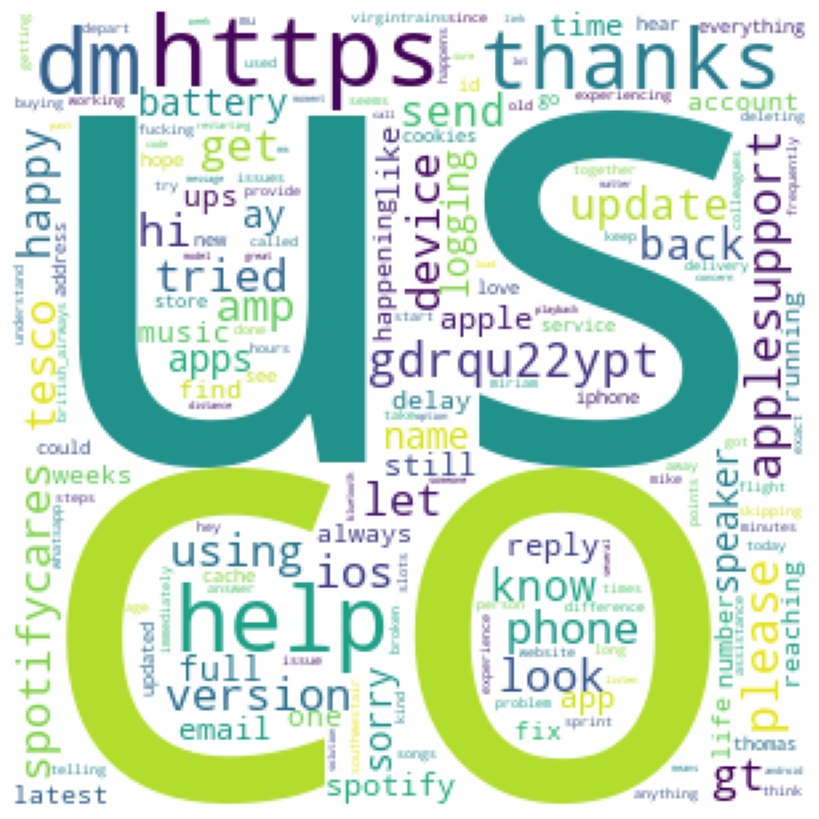

In [180]:
wc = WordCloud(background_color='white', width = 300, 
height=300, margin=2)
wc.fit_words(freq_df['tfidf'].to_dict() )
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wc)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

In [181]:
df['num_tokens'] = df['tokens'].map(len)
def count_keywords(tokens, keywords): 
    tokens = [t for t in tokens if t in keywords]
    counter = Counter(tokens)
    return [counter.get(k, 0) for k in keywords]


In [182]:
def count_keywords_by(df, by, keywords, column='tokens'):
 
    df = df.reset_index(drop=True) # if the supplied dataframe has gaps in the index
    freq_matrix = df[column].apply(count_keywords, keywords=keywords)
    freq_df = pd.DataFrame.from_records(freq_matrix, columns=keywords)
    freq_df[by] = df[by] # copy the grouping column(s)
 
    return freq_df.groupby(by=by).sum().sort_values(by)

**HEATMAP:**

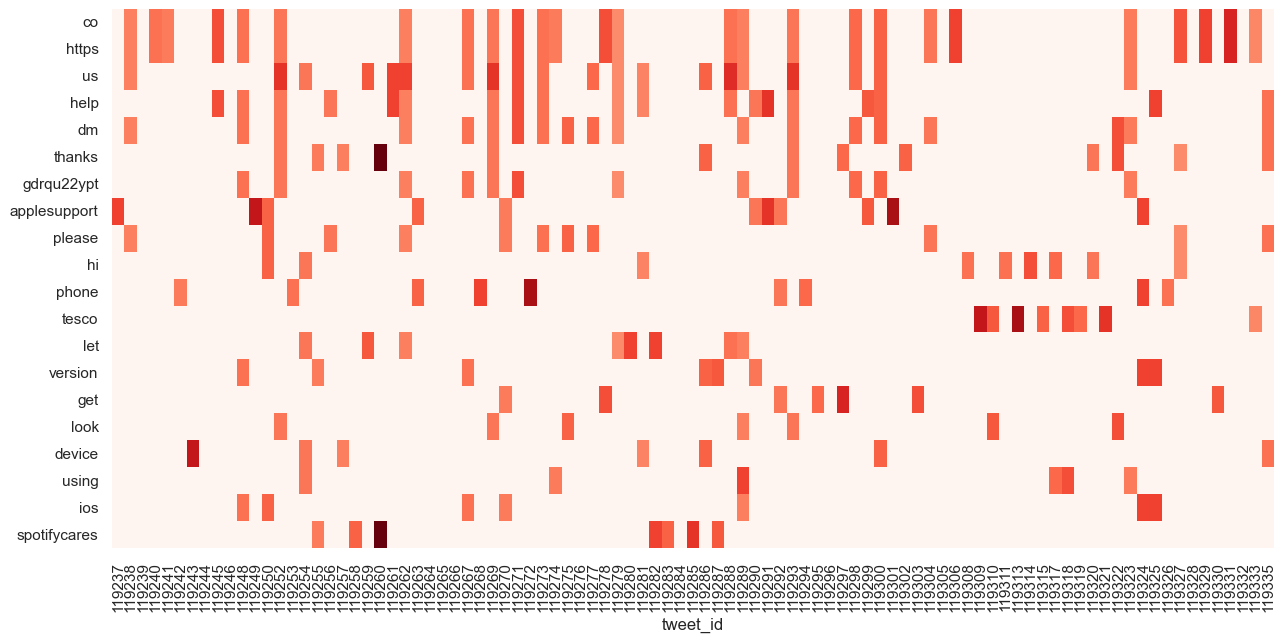

In [183]:
import seaborn as sns
keywords = ['co','https','us','help','dm','thanks','gdrqu22ypt','applesupport','please','hi','phone','tesco','let','version','get','look','device','using','ios','spotifycares' ]  
freq_df = count_keywords_by(df, by='tweet_id', keywords=keywords)

# compute relative frequencies based on total number of tokens per year
freq_df = freq_df.div(df.groupby('tweet_id')['num_tokens'].sum(), axis=0)

# apply square root as sublinear filter for better contrast
freq_df = freq_df.apply(np.sqrt)
plt.figure(figsize=(15, 7)) 
sns.set(font_scale=1) 
sns.heatmap(data=freq_df.T, xticklabels=True, yticklabels=True, cbar=False, cmap="Reds")
sns.set(font_scale=1)